In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\AFA\\Desktop\\Machine learning files\\Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df = df.drop("Address", axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
from sklearn.preprocessing import StandardScaler
x = df.values[:, 1:]
x = np.nan_to_num(x)
clus_dataset = StandardScaler().fit_transform(x)
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [23]:
from sklearn.cluster import KMeans
n_clus = 4
k_means = KMeans(init='k-means++', n_clusters=n_clus, n_init=12)
k_means.fit(x)
labels = k_means.labels_
centers = k_means.cluster_centers_
print(labels)
print(centers)

[2 1 0 2 3 0 0 0 2 1 0 2 2 2 2 2 2 2 0 2 2 2 0 0 1 0 2 2 0 2 1 0 2 2 2 2 2
 2 2 1 2 1 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 1 2
 2 2 0 2 1 0 0 0 1 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 0 0 2 0 2 2 0 0 0
 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 1 1 2 0 2 2 0 0 2 2 0 2 2 0 0 2 2 2 2 2 0 2 2 0 0 2 2 1 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 3 2 1 2 2 2 2 0 2 3 1 2 2 0 0 0 2 2 0 0 0 0 2 1
 2 2 2 2 1 2 2 0 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 1 0 0 0 2 2 2 2 2 0 2 2 2 2
 2 2 0 0 0 0 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 1 1 2 1 2 0 2 1 0 2 2 2 2 2 2
 2 2 2 1 0 0 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 1 2 2 0 2 2 1 0 0 1 2
 2 0 2 2 0 2 0 2 0 2 2 0 2 2 0 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 0 2 0 1 1 0
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2
 0 1 2 2 0 2 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 0 0 0 2 2 3
 0 2 0 0 0 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 1 2 0 1 0 2 0 2 2 2 0
 2 0 2 2 2 2 1 2 2 2 0 2 

In [24]:
df["clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3


In [25]:
df.groupby("clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_km,,,,,,,,,
0,411.273543,39.650224,1.816143,12.798206,61.789238,2.300538,4.355646,0.211957,10.743498
1,399.640625,43.390625,2.156250,19.250000,121.453125,3.830984,7.376563,0.122449,9.262500
2,433.723327,31.989150,1.605787,5.394213,27.871609,0.910043,1.880282,0.293478,10.081736
3,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000


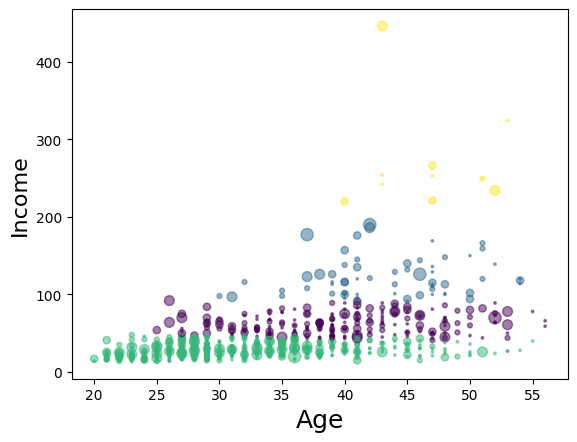

In [26]:
area = np.pi * (x[:, 1])**2
plt.scatter(x[:, 0], x[:, 3], s=area, c=labels.astype(np.float32), alpha=0.5)
plt.xlabel("Age", fontsize=18)
plt.ylabel("Income", fontsize=16)
plt.show()